## PETIT PREPROCESSING

### *library and setup dfset*

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fraude_bancaire_synthetique_final.csv')
df 

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.0,Mastercard,Houston,femelle,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,NaN,Mastercard,Houston,femelle,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.0,Visa,Houston,male,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.0,Mastercard,Orlando,femelle,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.0,Mastercard,Orlando,femelle,0.0
...,...,...,...,...,...,...,...,...,...
1015,48.973513,262962.250877,52.367001,3.428887e+06,8.0,Visa,Orlando,male,0.0
1016,42.298180,429413.188793,43.633980,3.255258e+06,2.0,NaN,Houston,male,0.0
1017,42.734031,531726.219363,37.934063,5.980733e+06,11.0,Mastercard,Houston,femelle,0.0
1018,44.454998,232283.191451,12.925355,5.094767e+06,12.0,Mastercard,Orlando,male,0.0


### *checking target*

In [282]:
import plotly.express as px
freq = df['fraude'].value_counts(normalize=True).reset_index()
freq.columns = ['fraude', 'Pourcentage']
freq['Pourcentage'] *= 100

# Graphique circulaire interactif
fig = px.pie(freq, names='fraude', values='Pourcentage', 
             title='pourcentage de fraude (en %)', 
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textinfo='percent+label', pull=[0.05]*len(freq))
fig.show()

nous avons donc une classification car le target est constitué ce de 0 et 1 ce pendant on a un important déséquilibre de données car nous voyons une classe majoritaire 0.0 et minoritaire 1.0

### *description des données*


In [283]:
df.describe()

,age,salaire,score_credit,montant_transaction,anciennete_compte,fraude
count,1003.000000,1002.000000,998.000000,9.960000e+02,999.000000,982.000000
mean,40.408051,297164.636768,49.567810,5.088725e+06,9.655656,0.045825
std,7.805954,136089.166672,19.142124,2.843704e+06,4.815800,0.209212
min,24.000000,75000.000000,3.000000,2.500000e+04,1.000000,0.000000
25%,35.205528,195695.682449,36.335605,3.118899e+06,6.000000,0.000000
50%,40.452085,294562.124263,49.642099,4.982903e+06,10.000000,0.000000
75%,45.614974,391034.624076,62.795183,6.926266e+06,13.000000,0.000000
max,60.000000,715256.040844,99.000000,1.513330e+07,25.000000,1.000000


d'après le describe nous avons les valeurs min et max de toutes nos colonnes, les 3 quartiles et l'éloignement des données par rapport à la moyenne

### *type de colonnes*

In [284]:
df.dtypes

age                    float64
salaire                float64
score_credit           float64
montant_transaction    float64
anciennete_compte      float64
type_carte              object
region                  object
genre                   object
fraude                 float64
dtype: object

la colonne fraude qui est notre target est initiliser comme un float64 hors pour notre entrainement il faudra le passer en valeur catégorielle ou integer

### *visualisation claire*

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1003 non-null   float64
 1   salaire              1002 non-null   float64
 2   score_credit         998 non-null    float64
 3   montant_transaction  996 non-null    float64
 4   anciennete_compte    999 non-null    float64
 5   type_carte           997 non-null    object 
 6   region               1003 non-null   object 
 7   genre                997 non-null    object 
 8   fraude               982 non-null    float64
dtypes: float64(6), object(3)
memory usage: 71.8+ KB


### *visualisation des valeurs catégorielle*

In [286]:
print(df.region.value_counts())
print(df.type_carte.value_counts())
print(df.genre.value_counts())

region
Houston    386
Orlando    322
Miami      295
Name: count, dtype: int64
type_carte
Visa          573
Mastercard    424
Name: count, dtype: int64
genre
male       499
femelle    498
Name: count, dtype: int64


nos colonnes catégorielle sont bien équilibré par contre

### *check and replace mixing value*

In [287]:
df.isnull().sum()

age                    17
salaire                18
score_credit           22
montant_transaction    24
anciennete_compte      21
type_carte             23
region                 17
genre                  23
fraude                 38
dtype: int64

In [288]:
def replace_value(df):
    for col in df.columns:
        if col == "fraude":
            continue

        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].mean())

        else:
            if df[col].isna().sum() > 0:
                df[col] = df[col].fillna(df[col].mode()[0])

    return df


In [289]:
replace_value(df)

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,Mastercard,Houston,femelle,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,Mastercard,Houston,femelle,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,Visa,Houston,male,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,Mastercard,Orlando,femelle,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,Mastercard,Orlando,femelle,0.0
...,...,...,...,...,...,...,...,...,...
1015,48.973513,262962.250877,52.367001,3.428887e+06,8.000000,Visa,Orlando,male,0.0
1016,42.298180,429413.188793,43.633980,3.255258e+06,2.000000,Visa,Houston,male,0.0
1017,42.734031,531726.219363,37.934063,5.980733e+06,11.000000,Mastercard,Houston,femelle,0.0
1018,44.454998,232283.191451,12.925355,5.094767e+06,12.000000,Mastercard,Orlando,male,0.0


### *checking*

In [290]:
df.isnull().sum()

age                     0
salaire                 0
score_credit            0
montant_transaction     0
anciennete_compte       0
type_carte              0
region                  0
genre                   0
fraude                 38
dtype: int64

en vérifians vous voyez bien que j'ai évité de remplacer par la moyenne les valeurs manquante de fraude car vu quil y'a un important déséquilibre dans la colonne elle va juste augmenter la classe majoritaire 

### *check and replace duplicates values*

In [291]:
duplicate = df.duplicated().value_counts()
duplicate

False    1010
True       10
Name: count, dtype: int64

In [292]:
df = df.drop_duplicates()

### *Encoding categorial columns*

In [293]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() == 2:
            df[col] = le.fit_transform(df[col])

In [294]:
label_encoding(df)

In [295]:
def frequency_encoding(df, column):
    fe = df[column].value_counts()/len(df)
    df[column] = df[column].map(fe)
    
    return df

In [296]:
frequency_encoding(df, 'region')

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,0,0.395050,0,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,0,0.395050,0,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,1,0.395050,1,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,0,0.316832,0,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,0,0.316832,0,0.0
...,...,...,...,...,...,...,...,...,...
1015,48.973513,262962.250877,52.367001,3.428887e+06,8.000000,1,0.316832,1,0.0
1016,42.298180,429413.188793,43.633980,3.255258e+06,2.000000,1,0.395050,1,0.0
1017,42.734031,531726.219363,37.934063,5.980733e+06,11.000000,0,0.395050,0,0.0
1018,44.454998,232283.191451,12.925355,5.094767e+06,12.000000,0,0.316832,1,0.0


### *gestion des valeurs manquante dans le target*

nous allons séparer les valeurs manquante et non manquate pour avoir une bonne moyenne pour la réaffectation des valeurs, entrainer avec KNN faire une prediction et affecter les données aux valeurs manquantes

In [297]:
complete_data = df[df['fraude'].notna()]
incomplete_data = df[df['fraude'].isna()]
features = complete_data.drop('fraude', axis=1)
target = complete_data['fraude']
features_incomplete = incomplete_data.drop('fraude', axis=1)

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [299]:
preds = knn.predict(features_incomplete)

In [300]:
df.loc[df['fraude'].isna(), 'fraude'] = preds

In [301]:
df.isna().sum()

age                    0
salaire                0
score_credit           0
montant_transaction    0
anciennete_compte      0
type_carte             0
region                 0
genre                  0
fraude                 0
dtype: int64

### *rééquilibrons les données avec SMOTE*

In [302]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(df.drop('fraude', axis=1), df['fraude'].astype(int))

In [303]:
df_res = pd.DataFrame(X_res, columns=df.drop('fraude', axis=1).columns)
df_res['fraude'] = y_res
print(df_res.fraude.value_counts())

fraude
0    965
1    965
Name: count, dtype: int64


In [304]:
df = df_res
df

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,0,0.395050,0,0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,0,0.395050,0,0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,1,0.395050,1,0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,0,0.316832,0,0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,0,0.316832,0,0
...,...,...,...,...,...,...,...,...,...
1925,45.597241,298542.011574,85.246862,5.284009e+06,7.616324,0,0.368583,1,1
1926,43.876065,154884.988653,61.960407,4.682180e+06,13.085475,1,0.393378,1,1
1927,37.003946,356817.861161,64.005850,5.961519e+06,13.754219,1,0.316832,0,1
1928,49.699669,296987.130115,49.886796,5.745819e+06,13.929936,0,0.393679,1,1


In [305]:
data = df.drop(["genre","type_carte","region"],axis=1)

<Axes: >

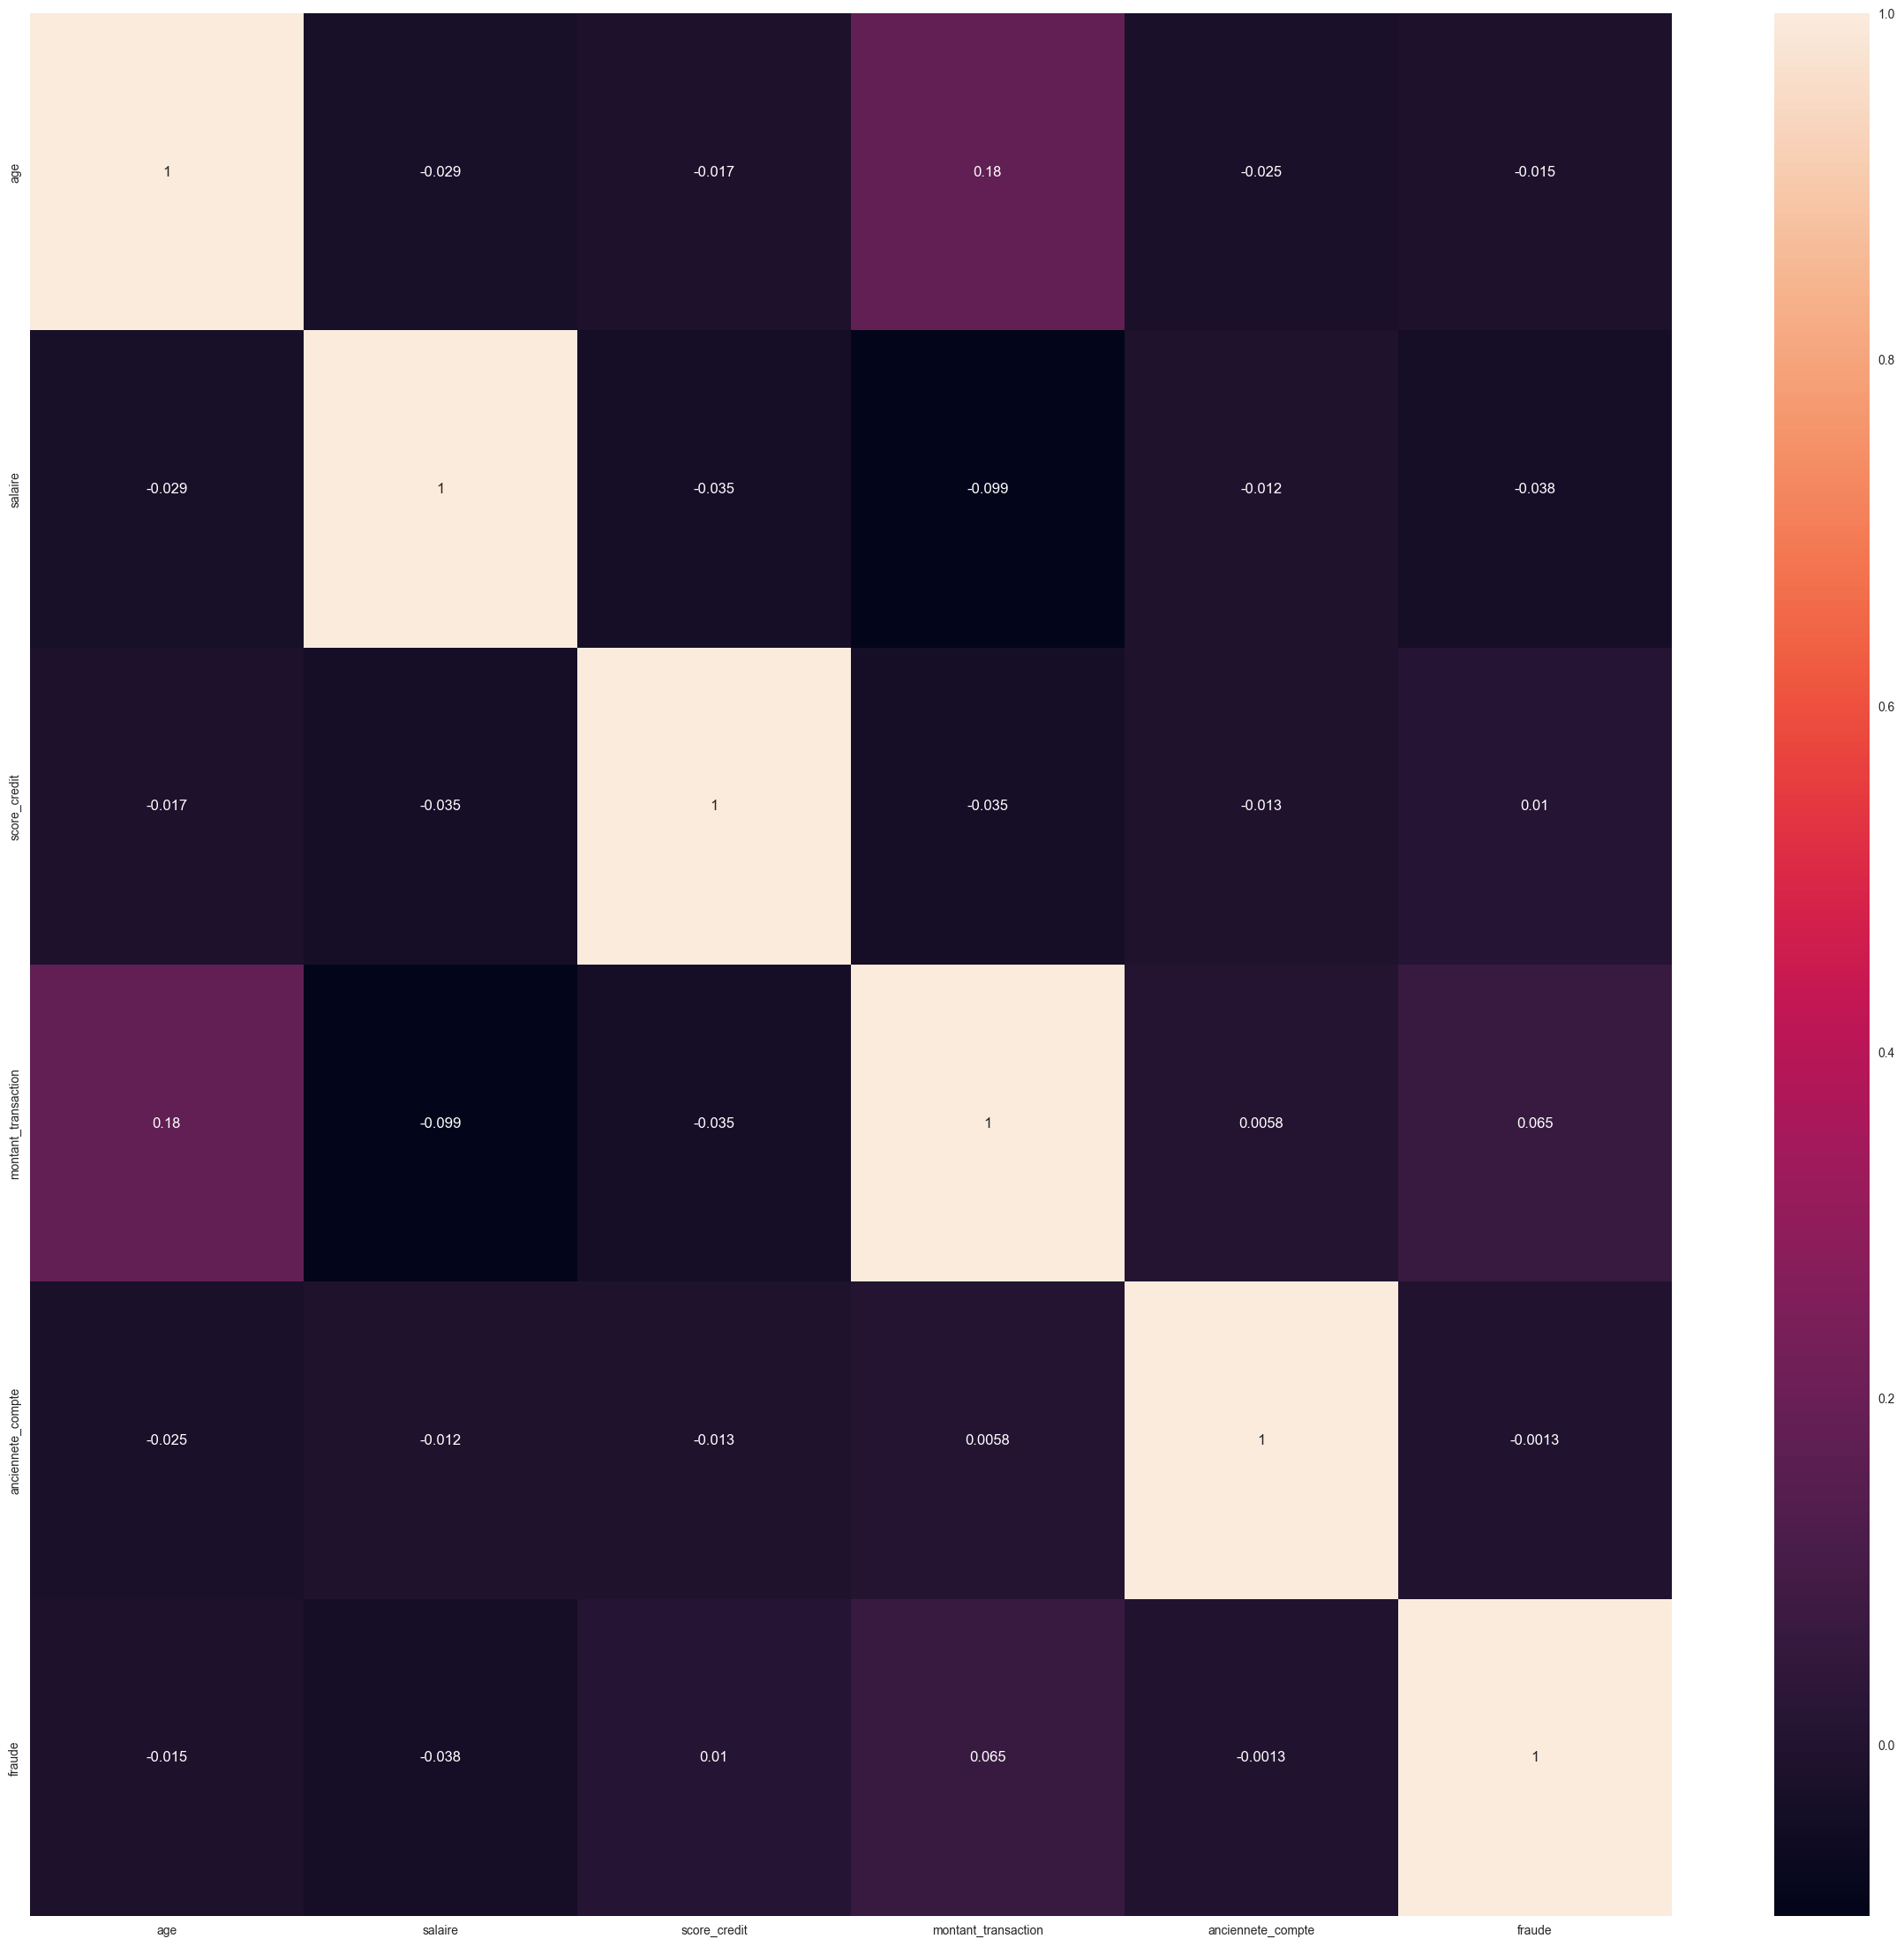

In [306]:
plt.figure(figsize=(30, 28)) 
sns.heatmap(data.corr(),annot=True) 

<Axes: xlabel='montant_transaction'>

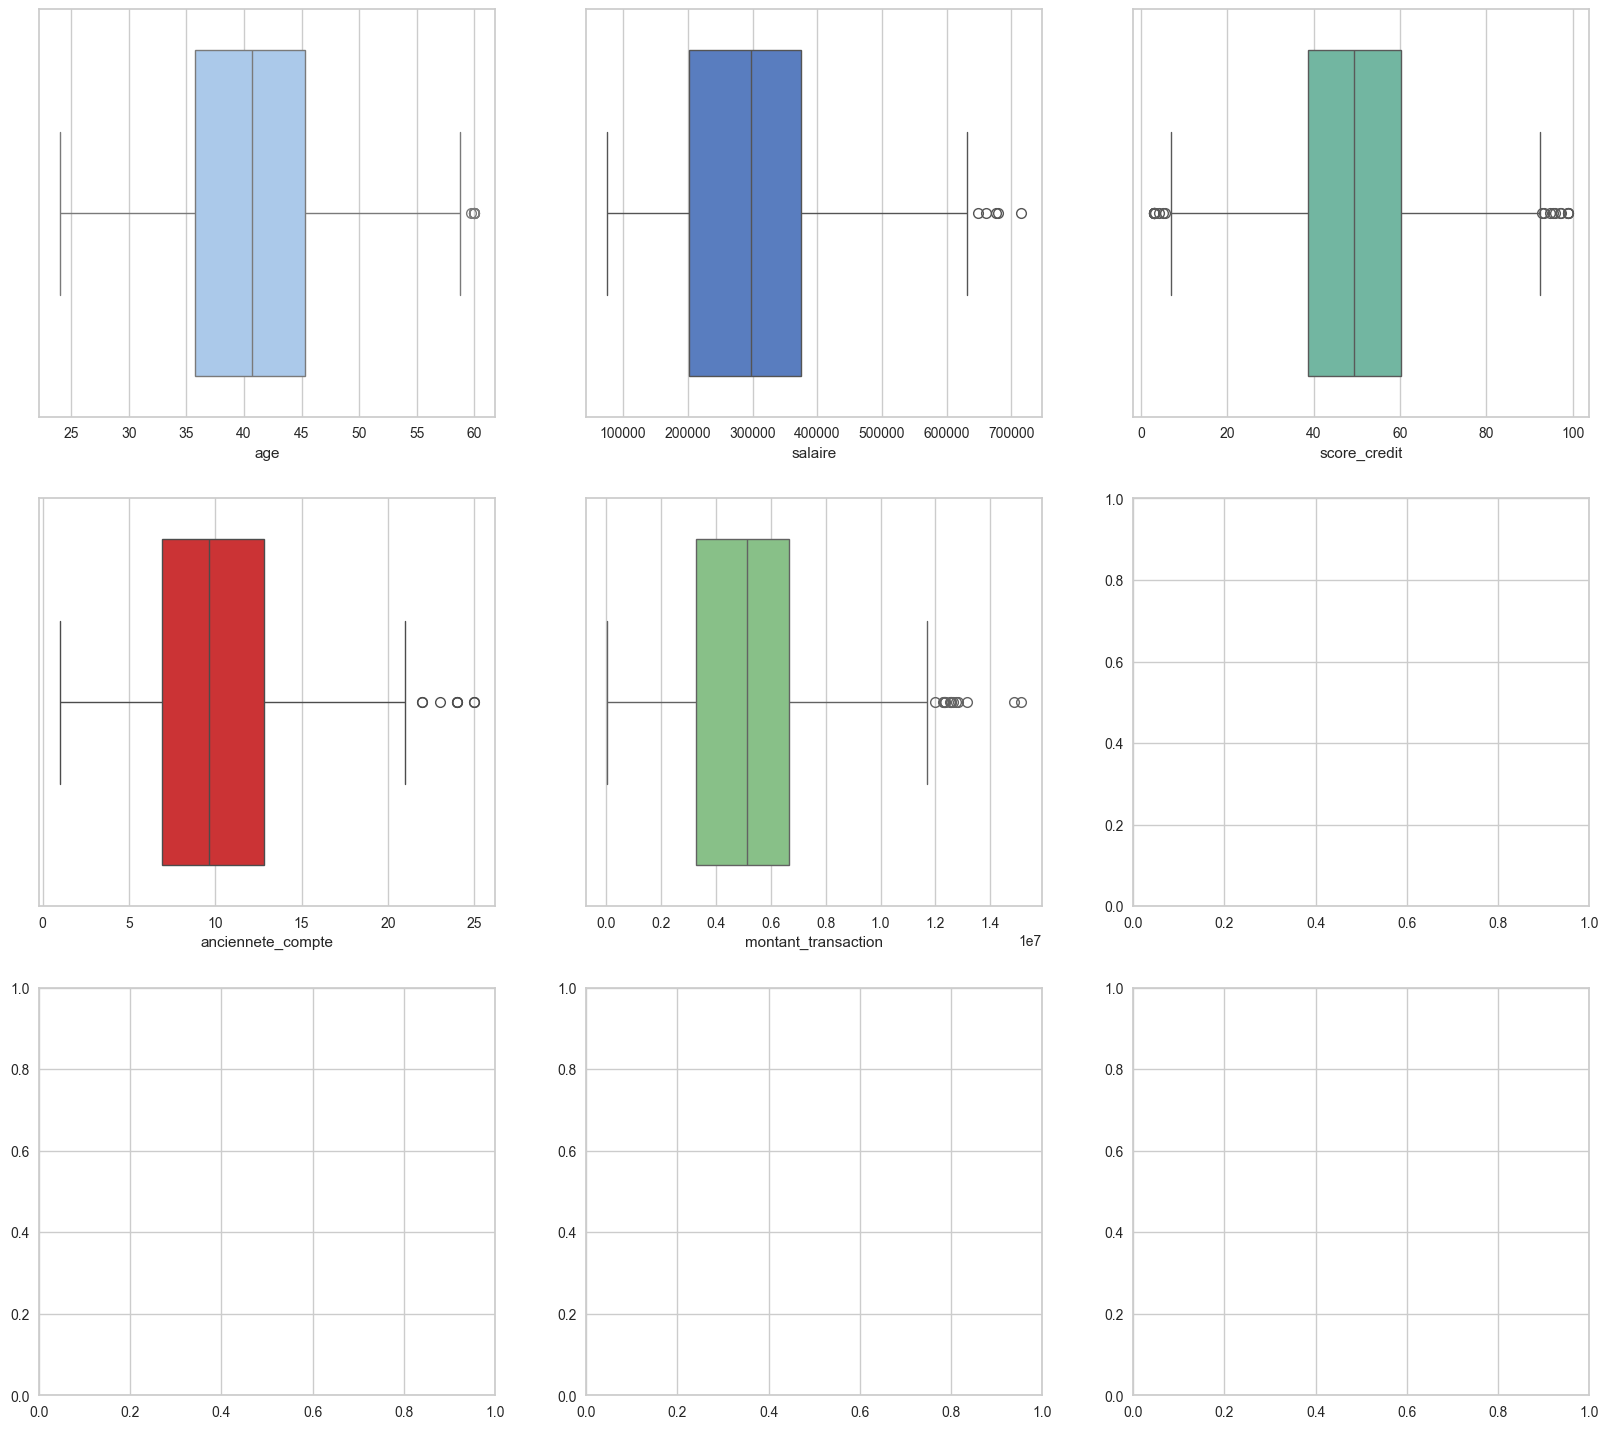

In [307]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
sns.boxplot(x="age",data=df,ax=axes[0, 0], palette="pastel")
sns.boxplot(x="salaire",data=df,ax=axes[0, 1], palette="muted")
sns.boxplot(x="score_credit",data=df, ax=axes[0, 2],palette="Set2")
sns.boxplot(x="anciennete_compte",data=df,ax=axes[1, 0],palette="Set1")
sns.boxplot(x="montant_transaction",data=df,ax=axes[1, 1],palette="Accent")


In [308]:
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

replace_outliers(df)

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,0.0,0.395050,0.0,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,0.0,0.395050,0.0,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,1.0,0.395050,1.0,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,0.0,0.316832,0.0,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,0.0,0.316832,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1925,45.597241,298542.011574,85.246862,5.284009e+06,7.616324,0.0,0.368583,1.0,1.0
1926,43.876065,154884.988653,61.960407,4.682180e+06,13.085475,1.0,0.393378,1.0,1.0
1927,37.003946,356817.861161,64.005850,5.961519e+06,13.754219,1.0,0.316832,0.0,1.0
1928,49.699669,296987.130115,49.886796,5.745819e+06,13.929936,0.0,0.393679,1.0,1.0


In [309]:
df['fraude'] = df['fraude'].astype(int)

In [310]:
df.fraude.value_counts()

fraude
0    965
1    965
Name: count, dtype: int64

## FIN PETIT PREPROCESSING

## CLASSIFICATION

In [311]:
from pycaret.classification import *

s = setup(df, target ='fraude', train_size=0.8, session_id=123, normalize =True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,fraude
2,Target type,Binary
3,Original data shape,"(1930, 9)"
4,Transformed data shape,"(1930, 9)"
5,Transformed train set shape,"(1544, 9)"
6,Transformed test set shape,"(386, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [315]:
get_config("X_transformed")

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre
1358,0.458529,0.088366,0.469373,0.551788,0.686217,0.0,1.000000,1.0
1442,0.774201,0.625030,0.478912,0.436243,0.361711,0.0,0.162921,1.0
1810,0.540933,0.321417,0.518444,0.815005,0.705819,0.0,0.093105,0.0
119,0.347402,0.827194,0.720413,0.283983,0.418073,0.0,0.268518,0.0
1319,0.162234,0.577275,0.422951,0.350129,0.731718,1.0,0.424090,1.0
...,...,...,...,...,...,...,...,...
1869,0.342986,0.425196,0.465963,0.112284,0.124686,0.0,0.116290,0.0
1380,0.473827,0.141508,0.363772,0.951378,0.392335,0.0,0.032968,0.0
1675,0.510400,0.571195,0.758960,0.466997,0.140822,0.0,0.268518,0.0
1193,0.555966,0.265978,0.329711,0.437815,0.224124,1.0,1.000000,1.0


In [316]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9657,0.9938,0.9624,0.9692,0.9656,0.9313,0.9319,3.1400
xgboost,Extreme Gradient Boosting,0.9631,0.9924,0.9638,0.9630,0.9632,0.9262,0.9266,0.3990
et,Extra Trees Classifier,0.9612,0.9942,0.9702,0.9533,0.9614,0.9223,0.9230,0.2690
rf,Random Forest Classifier,0.9566,0.9925,0.9495,0.9636,0.9561,0.9132,0.9141,0.4760
catboost,CatBoost Classifier,0.9559,0.9942,0.9559,0.9566,0.9560,0.9119,0.9124,5.8760
gbc,Gradient Boosting Classifier,0.9255,0.9787,0.9197,0.9310,0.9251,0.8510,0.8515,0.6870
dt,Decision Tree Classifier,0.9197,0.9197,0.9404,0.9035,0.9214,0.8393,0.8405,0.0780
ada,Ada Boost Classifier,0.8692,0.9389,0.8510,0.8837,0.8669,0.7384,0.7392,0.3670
knn,K Neighbors Classifier,0.8400,0.9351,0.9676,0.7723,0.8584,0.6801,0.7047,0.2540
qda,Quadratic Discriminant Analysis,0.7656,0.8283,0.7993,0.7497,0.7733,0.5311,0.5329,0.1040


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

je choisis random forest car je ne suis pas très à l'aise avec les 3 premiers meilleurs modèle et random forest a un très bon résultat

In [317]:
modele = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9613,0.9937,0.9615,0.9615,0.9615,0.9226,0.9226
1,0.9484,0.9930,0.9231,0.9730,0.9474,0.8968,0.8980
2,0.9226,0.9795,0.8831,0.9577,0.9189,0.8451,0.8476
3,0.9742,0.9979,1.0000,0.9506,0.9747,0.9484,0.9497
4,0.9610,0.9974,0.9481,0.9733,0.9605,0.9221,0.9224
5,0.9610,0.9960,0.9481,0.9733,0.9605,0.9221,0.9224
6,0.9675,0.9949,0.9740,0.9615,0.9677,0.9351,0.9351
7,0.9740,0.9965,0.9481,1.0000,0.9733,0.9481,0.9493
8,0.9610,0.9914,0.9870,0.9383,0.9620,0.9221,0.9233


In [ ]:
evaluate_model(modele)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [319]:
predict_model(modele)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9637,0.9925,0.9793,0.9497,0.9643,0.9275,0.9279


,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude,prediction_label,prediction_score
1441,42.527103,155959.328125,58.856510,3.218706e+06,1.341249,0.0,0.387752,0.0,1,1,0.98
1537,43.865021,207053.218750,46.293339,6.641360e+06,7.318032,0.0,0.343746,1.0,1,1,0.98
1684,35.123196,322923.000000,70.427765,6.208665e+06,13.727421,0.0,0.336582,0.0,1,1,0.87
617,47.647488,350297.593750,60.250874,1.246316e+06,6.000000,1.0,0.395050,0.0,0,0,0.89
838,32.095978,297164.625000,55.786777,3.009985e+06,14.000000,1.0,0.395050,0.0,0,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...
1869,36.201515,313048.781250,46.448589,1.337679e+06,3.581452,0.0,0.300554,0.0,1,1,0.92
1380,40.856117,154223.953125,37.660137,1.114731e+07,9.122777,0.0,0.291644,0.0,1,1,0.96
1675,42.157162,394787.531250,71.646362,5.484537e+06,3.915530,0.0,0.316832,0.0,1,1,0.78
1193,43.778164,223909.765625,34.730907,5.143380e+06,5.640195,1.0,0.395050,1.0,1,1,0.69


#### *optimisation avec GridSearch*

In [321]:
tuned_model = tune_model(modele, search_library='optuna') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9290,0.9802,0.9359,0.9241,0.9299,0.8580,0.8581
1,0.9290,0.9805,0.8590,1.0000,0.9241,0.8582,0.8670
2,0.8903,0.9535,0.8182,0.9545,0.8811,0.7804,0.7884
3,0.9548,0.9918,0.9351,0.9730,0.9536,0.9097,0.9103
4,0.9091,0.9801,0.8571,0.9565,0.9041,0.8182,0.8226
5,0.9416,0.9882,0.9221,0.9595,0.9404,0.8831,0.8838
6,0.9416,0.9845,0.9221,0.9595,0.9404,0.8831,0.8838
7,0.9481,0.9855,0.9221,0.9726,0.9467,0.8961,0.8973
8,0.9221,0.9749,0.9351,0.9114,0.9231,0.8442,0.8444


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [322]:
import pickle
pickle.dump(tuned_model, open('model.pkl', 'wb'))